### Exploratory Data Analysis on Fuel consumption 2000-2022

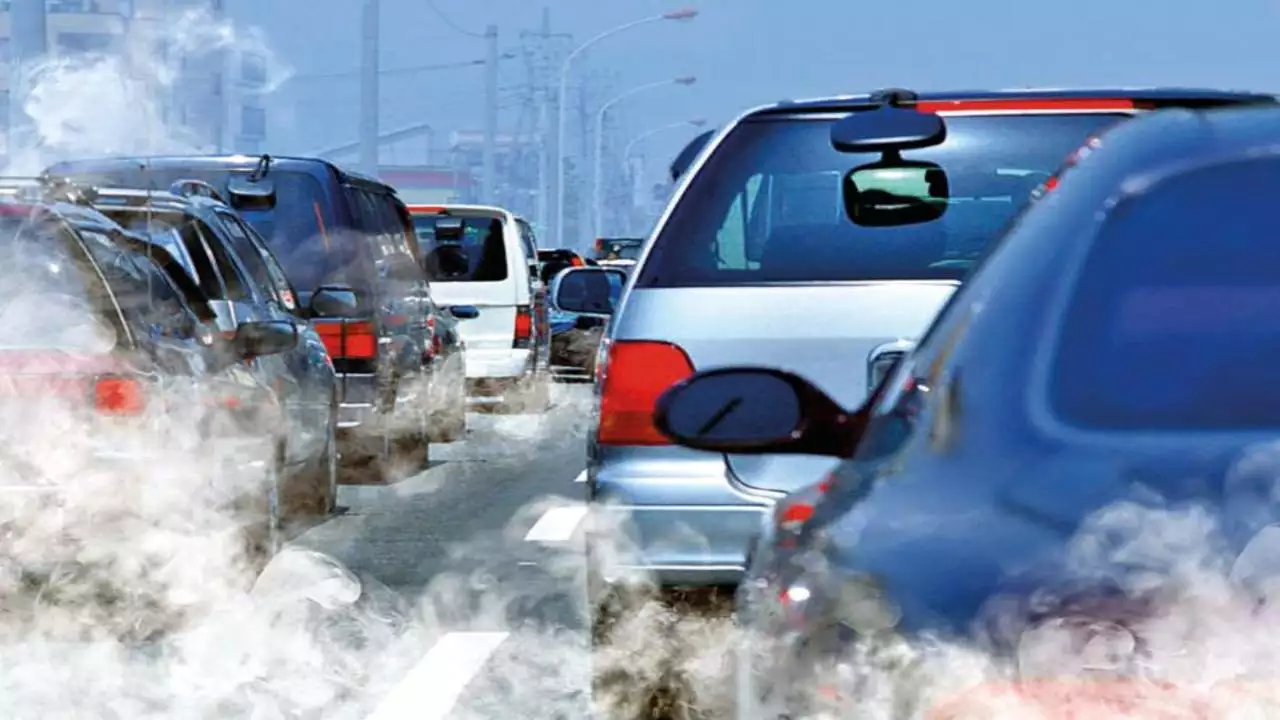

### About the Dataset:
* This dataset provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

### Note:

##### Model:

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* CNG = Compressed natural gas
* FFV = Flexible-fuel vehicle
* NGV = Natural gas vehicle
* #   = High output engine that provides more power than the standard engine of the same size

##### Transmission:

* A = Automatic
* AM = Automated manual
* AS = Automatic with select shift
* AV = Continuously variable
* M = Manual
* 3 - 10 = Number of gears

##### Fuel Type:
* X = Regular gasoline
* Z = Premium gasoline
* D = Diesel
* E = Ethanol (E85)
* N = Natural Gas

##### Descripton:
- MAKE = Company of the vehicle
- MODEL= Car model
- VEHICLE CLASS= Class of vehicle depending on their utility, capacity and weight
- ENGINE SIZE = Size of engine used in Litre
- CYLINDERS= Number of cylinders
- TRANSMISSION= Transmission type with number of gears
- FUEL =Type of Fuel used
- FUEL CONSUMPTION =Fuel consumption in city roads (L/100 km)
- HWY (L/100 km)=Fuel consumption in Hwy roads (L/100 km)
- COMB (L/100 km)=The combined fuel consumption (55% city, 45% highway) is shown in L/100 km
- COMB (mpg)=The combined fuel consumption in both city and highway is shown in miles per gallon(mpg)


### Aim:
* To find out which car brands and models emitting more CO2 emissions and which brands of cars emit less co2 emissions by exploratory data analysis.After interpreting the results, it helps the car manufaturing companies to imporove their performance in reducing the co2 emissions.


### Importing the Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore") 

### 1.Read the csv file from kaggle


![](co2-emissions.jpg)

In [4]:
fc = pd.read_csv('Fuel_Consumption_2000-2022_eda.csv') 

In [5]:
fc

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


#### To find out the number of rows and columns present in the selected dataset

In [6]:
fc.shape 

(22556, 13)

#### Observation:
* There are 22556 records and 13 features in this dataset.

#### Displaying all the columns with their labels

In [7]:
fc.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION', 'HWY (L/100 km)',
       'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
      dtype='object')

#### Displaying the columns and its corresponding datatypes

In [8]:
fc.dtypes

YEAR                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
HWY (L/100 km)      float64
COMB (L/100 km)     float64
COMB (mpg)            int64
EMISSIONS             int64
dtype: object

#### Observation:
*  The features such as Year, Engine Size(L), Cylinders, Fuel Consumption, Hwy (L/100 km), Comb (L/100 km), Comb (mpg) and  Emissions are numerical and continuous in nature.
* The features such as Make, Model, Vehicle Class, Transmission and Fuel are categorical in nature.

#### To find the dimensions of the dataset

In [9]:
fc.ndim  

2

#### To find the number of elements ie no of rows*no of columns

In [10]:
fc.size

293228

#### Renaming the features for better understanding.

In [11]:
fc.rename(columns={'FUEL':'FUEL_TYPE','FUEL CONSUMPTION':'FUEL_CONSUMPTION_CITY (L/100 km)','HWY (L/100 km)':'FUEL_CONSUMPTION_HWY (L/100 km)','COMB (L/100 km)':'FUEL_CONSUMPTION_COMB (L/100 km)','COMB (mpg)':'FUEL_CONSUMPTION_COMB (mpg)','EMISSIONS':'CO2_EMISSIONS'}, inplace=True)

In [12]:
fc

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


#### Mapping similar labels into a single label for Transmission 

In [13]:
fc['TRANSMISSION'].unique()

array(['A4', 'M5', 'AS5', 'AS4', 'M6', 'A5', 'A3', 'AS6', 'AV', 'A6',
       'AM6', 'A7', 'AM7', 'AS7', 'AS8', 'M4', 'A8', 'M7', 'AV7', 'AV8',
       'AV6', 'AM5', 'A9', 'AS9', 'AM8', 'AM9', 'AS10', 'A10', 'AV10',
       'AV1'], dtype=object)

In [14]:
fc["TRANSMISSION"] = np.where(fc["TRANSMISSION"].isin(["A3","A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", fc["TRANSMISSION"])
fc["TRANSMISSION"] = np.where(fc["TRANSMISSION"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", fc["TRANSMISSION"])
fc["TRANSMISSION"] = np.where(fc["TRANSMISSION"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", fc["TRANSMISSION"])
fc["TRANSMISSION"] = np.where(fc["TRANSMISSION"].isin(["AV","AV1", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", fc["TRANSMISSION"])
fc["TRANSMISSION"] = np.where(fc["TRANSMISSION"].isin(["M4","M5", "M6", "M7"]), "Manual", fc["TRANSMISSION"])

In [15]:
fc

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,Automatic,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,Manual,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,Automatic with Select Shift,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,Automatic,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,Automatic,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Automatic with Select Shift,Z,11.5,8.4,10.1,28,236


#### Renaming fuel types into their respective fuel names.

In [16]:
fc['FUEL_TYPE'].unique()

array(['X', 'Z', 'E', 'N', 'D'], dtype=object)

In [17]:
fc["FUEL_TYPE"] = np.where(fc["FUEL_TYPE"].isin(["X"]), "Regular gasoline", fc["FUEL_TYPE"])
fc["FUEL_TYPE"] = np.where(fc["FUEL_TYPE"].isin(["Z"]), "Premium gasoline", fc["FUEL_TYPE"])
fc["FUEL_TYPE"] = np.where(fc["FUEL_TYPE"].isin(["E"]), "Ethanol", fc["FUEL_TYPE"])
fc["FUEL_TYPE"] = np.where(fc["FUEL_TYPE"].isin(["N"]), "Natural gas", fc["FUEL_TYPE"])
fc["FUEL_TYPE"] = np.where(fc["FUEL_TYPE"].isin(["D"]), "Diesel", fc["FUEL_TYPE"])

In [18]:
fc

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,Automatic,Regular gasoline,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,Manual,Regular gasoline,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,Automatic with Select Shift,Premium gasoline,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,Automatic,Premium gasoline,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,Automatic,Regular gasoline,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Premium gasoline,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Premium gasoline,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Premium gasoline,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Automatic with Select Shift,Premium gasoline,11.5,8.4,10.1,28,236


#### To check first five records of the dataset.

In [19]:
fc.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,Automatic,Regular gasoline,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,Manual,Regular gasoline,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,Automatic with Select Shift,Premium gasoline,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,Automatic,Premium gasoline,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,Automatic,Regular gasoline,10.0,7.0,8.6,33,198


### 2.Data Processing

#### Information about the dataset

In [20]:
fc.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   YEAR                              22556 non-null  int64  
 1   MAKE                              22556 non-null  object 
 2   MODEL                             22556 non-null  object 
 3   VEHICLE CLASS                     22556 non-null  object 
 4   ENGINE SIZE                       22556 non-null  float64
 5   CYLINDERS                         22556 non-null  int64  
 6   TRANSMISSION                      22556 non-null  object 
 7   FUEL_TYPE                         22556 non-null  object 
 8   FUEL_CONSUMPTION_CITY (L/100 km)  22556 non-null  float64
 9   FUEL_CONSUMPTION_HWY (L/100 km)   22556 non-null  float64
 10  FUEL_CONSUMPTION_COMB (L/100 km)  22556 non-null  float64
 11  FUEL_CONSUMPTION_COMB (mpg)       22556 non-null  int64  
 12  CO2_

#### To check the null values for each column

In [21]:
fc.isnull().sum() 

YEAR                                0
MAKE                                0
MODEL                               0
VEHICLE CLASS                       0
ENGINE SIZE                         0
CYLINDERS                           0
TRANSMISSION                        0
FUEL_TYPE                           0
FUEL_CONSUMPTION_CITY (L/100 km)    0
FUEL_CONSUMPTION_HWY (L/100 km)     0
FUEL_CONSUMPTION_COMB (L/100 km)    0
FUEL_CONSUMPTION_COMB (mpg)         0
CO2_EMISSIONS                       0
dtype: int64

#### Observation:
* It is observed that there is no null values present in this dataset.

#### To check the duplicate rows present in the selected dataset

In [22]:
fc.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22551    False
22552    False
22553    False
22554    False
22555    False
Length: 22556, dtype: bool

#### To check how many rows were duplicated

In [23]:
fc.duplicated().sum()

8

#### Observation:
* 8 records were duplicated that can be dropped.

#### To drop the duplicated rows

In [24]:
fc.drop_duplicates(inplace=True)

In [25]:
fc

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,Automatic,Regular gasoline,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,Manual,Regular gasoline,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,Automatic with Select Shift,Premium gasoline,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,Automatic,Premium gasoline,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,Automatic,Regular gasoline,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Premium gasoline,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Premium gasoline,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,Automatic with Select Shift,Premium gasoline,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,Automatic with Select Shift,Premium gasoline,11.5,8.4,10.1,28,236


#### Statistical summary of the dataset

In [26]:
fc.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
count,22548.000000,22548.000000,22548.000000,22548.000000,22548.000000,22548.000000,22548.000000,22548.000000
mean,2011.553442,3.357074,5.854621,12.764627,8.919589,11.035169,27.372095,250.085196
std,6.298269,1.335399,1.819571,3.500642,2.274718,2.910701,7.376109,59.348959
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.800000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [27]:
fc.describe(include='all')

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
count,22548.000000,22548,22548,22548,22548.000000,22548.000000,22548,22548,22548.000000,22548.000000,22548.000000,22548.000000,22548.000000
unique,NaN,87,4242,32,NaN,NaN,5,5,NaN,NaN,NaN,NaN,NaN
top,NaN,CHEVROLET,JETTA,SUV,NaN,NaN,Automatic,Regular gasoline,NaN,NaN,NaN,NaN,NaN
freq,NaN,1725,89,2639,NaN,NaN,8690,11815,NaN,NaN,NaN,NaN,NaN
mean,2011.553442,NaN,NaN,NaN,3.357074,5.854621,NaN,NaN,12.764627,8.919589,11.035169,27.372095,250.085196
std,6.298269,NaN,NaN,NaN,1.335399,1.819571,NaN,NaN,3.500642,2.274718,2.910701,7.376109,59.348959
min,2000.000000,NaN,NaN,NaN,0.800000,2.000000,NaN,NaN,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,NaN,NaN,NaN,2.300000,4.000000,NaN,NaN,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,NaN,NaN,NaN,3.000000,6.000000,NaN,NaN,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,NaN,NaN,NaN,4.200000,8.000000,NaN,NaN,14.800000,10.200000,12.700000,31.000000,288.000000


#### To find the correlation between features

In [28]:
fc.corr()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
YEAR,1.000000,-0.077496,-0.072293,-0.098272,-0.007143,-0.067666,0.079646,-0.047484
ENGINE SIZE,-0.077496,1.000000,0.913359,0.821551,0.749361,0.807268,-0.754935,0.821255
CYLINDERS,-0.072293,0.913359,1.000000,0.794856,0.698246,0.771494,-0.714102,0.802100
FUEL_CONSUMPTION_CITY (L/100 km),-0.098272,0.821551,0.794856,1.000000,0.942347,0.992958,-0.921325,0.919060
FUEL_CONSUMPTION_HWY (L/100 km),-0.007143,0.749361,0.698246,0.942347,1.000000,0.975014,-0.884711,0.894742
FUEL_CONSUMPTION_COMB (L/100 km),-0.067666,0.807268,0.771494,0.992958,0.975014,1.000000,-0.920880,0.922943
FUEL_CONSUMPTION_COMB (mpg),0.079646,-0.754935,-0.714102,-0.921325,-0.884711,-0.920880,1.000000,-0.901796
CO2_EMISSIONS,-0.047484,0.821255,0.802100,0.919060,0.894742,0.922943,-0.901796,1.000000


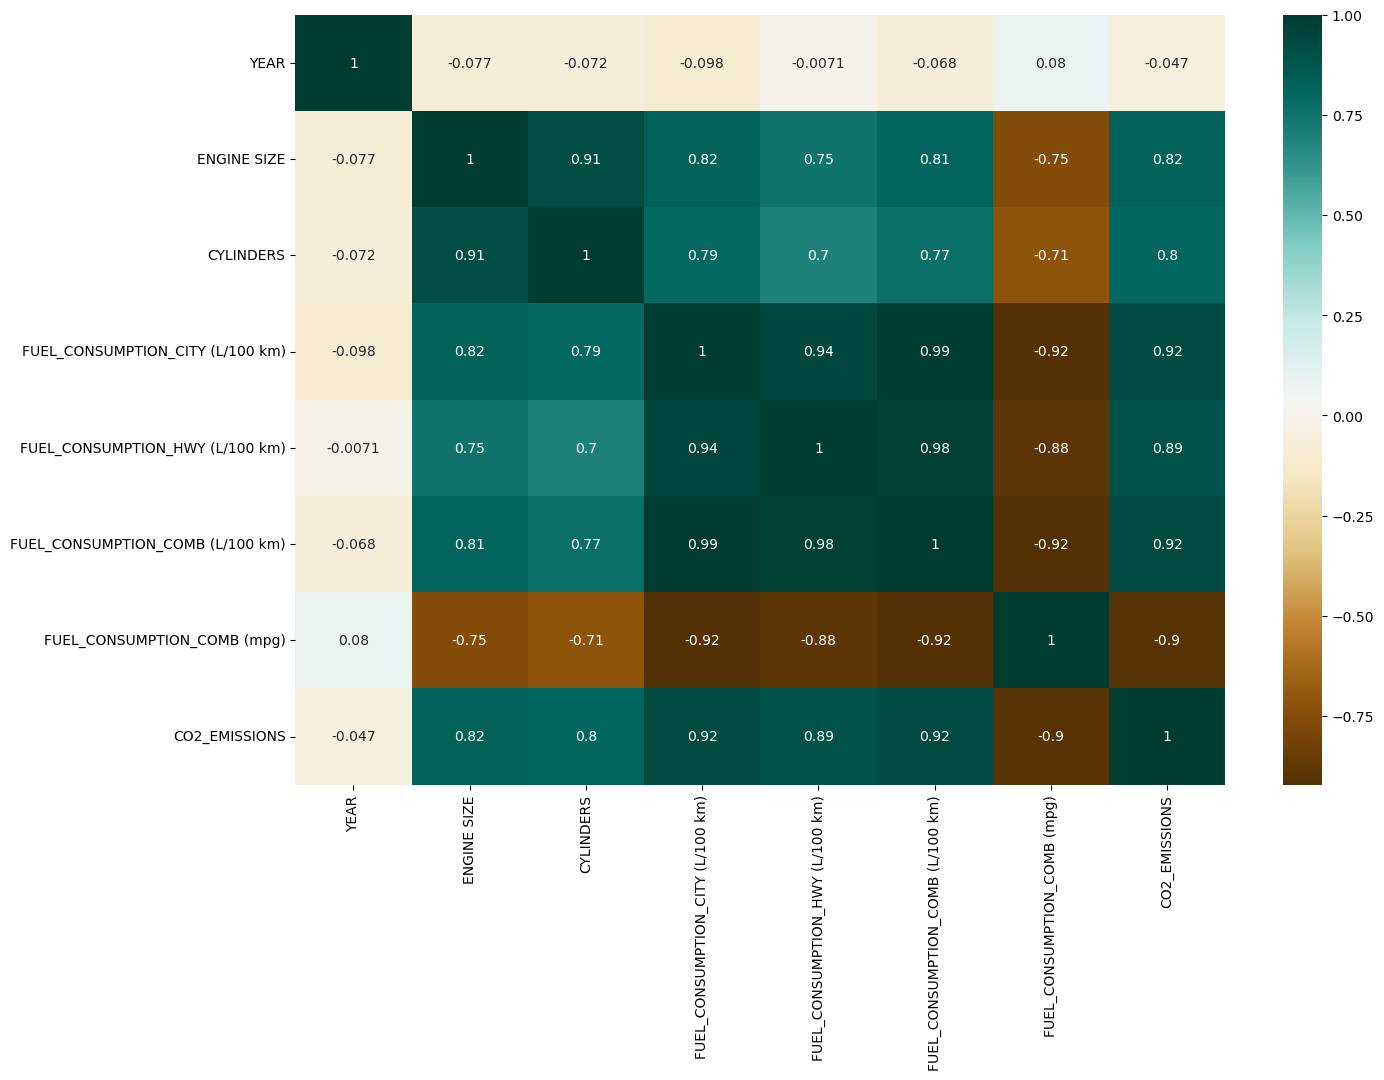

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(fc.corr(),cmap='BrBG',annot= True)
plt.show()

In [32]:
fc.corr()['CO2_EMISSIONS'].sort_values()

FUEL_CONSUMPTION_COMB (mpg)        -0.901796
YEAR                               -0.047484
CYLINDERS                           0.802100
ENGINE SIZE                         0.821255
FUEL_CONSUMPTION_HWY (L/100 km)     0.894742
FUEL_CONSUMPTION_CITY (L/100 km)    0.919060
FUEL_CONSUMPTION_COMB (L/100 km)    0.922943
CO2_EMISSIONS                       1.000000
Name: CO2_EMISSIONS, dtype: float64

#### Observation
* CO2_Emissions is highly correlated with cylinders and engine size, fuel_consumption_HWY(L/100 km) and fuel_consumption_city(L/100 km) .

#### To find the Covariance

In [46]:
fc.cov()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
YEAR,39.668187,-0.651800,-0.828484,-2.166700,-0.102335,-1.240479,3.700077,-17.749286
ENGINE SIZE,-0.651800,1.783289,2.219328,3.840547,2.276301,3.137807,-7.436144,65.088201
CYLINDERS,-0.828484,2.219328,3.310837,5.062964,2.890048,4.086006,-9.584214,86.618454
FUEL_CONSUMPTION_CITY (L/100 km),-2.166700,3.840547,5.062964,12.254495,7.503889,10.117573,-23.789640,190.943489
FUEL_CONSUMPTION_HWY (L/100 km),-0.102335,2.276301,2.890048,7.503889,5.174344,6.455594,-14.844186,120.792086
FUEL_CONSUMPTION_COMB (L/100 km),-1.240479,3.137807,4.086006,10.117573,6.455594,8.472179,-19.770962,159.435718
FUEL_CONSUMPTION_COMB (mpg),3.700077,-7.436144,-9.584214,-23.789640,-14.844186,-19.770962,54.406978,-394.774063
CO2_EMISSIONS,-17.749286,65.088201,86.618454,190.943489,120.792086,159.435718,-394.774063,3522.298990


### Data Visualization

#### 1.Frequency distribution of the feature 'MAKE'

In [47]:
fc.value_counts('MAKE')  

MAKE
CHEVROLET        1725
BMW              1490
GMC              1357
FORD             1276
MERCEDES-BENZ     935
                 ... 
ALFA ROMEO          8
SRT                 4
GENESIS             4
BUGATTI             3
PLYMOUTH            2
Length: 87, dtype: int64

In [48]:
fc['MAKE'].nunique()

87

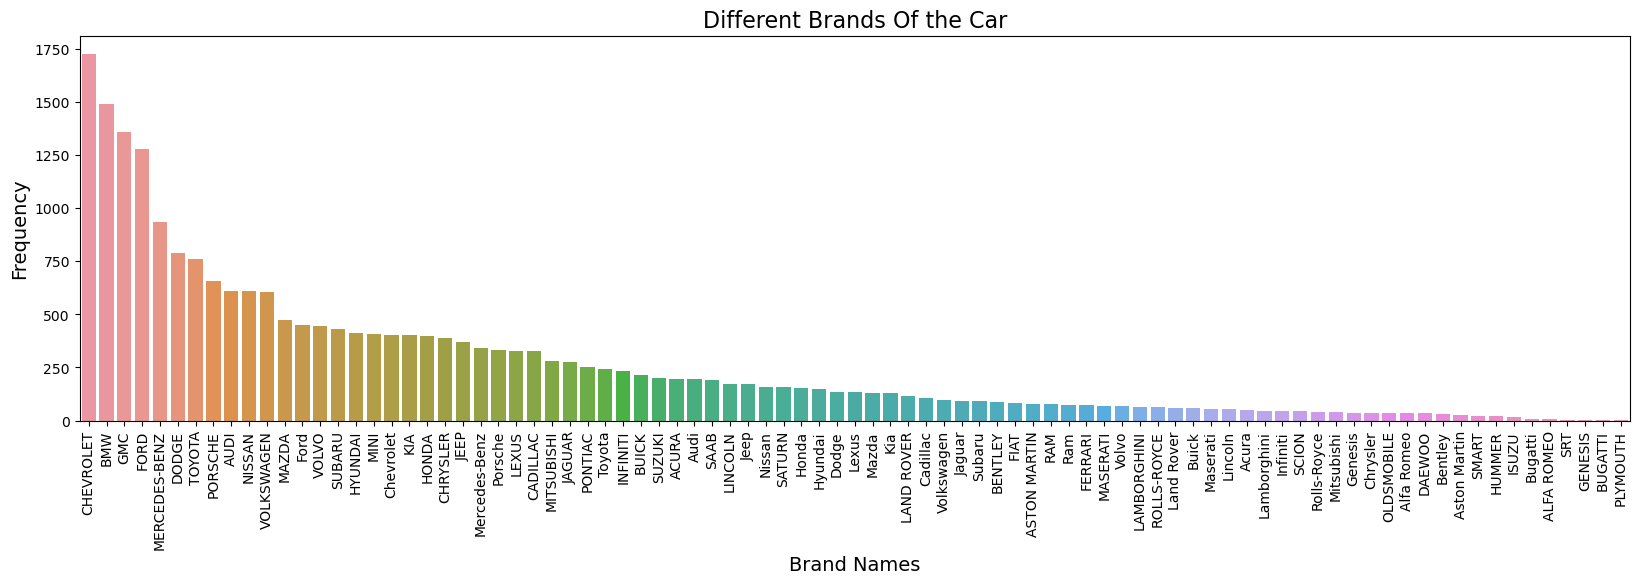

In [49]:
fig=plt.subplots(figsize=(20, 5))
sns.barplot(x=fc['MAKE'].value_counts().index,y=fc['MAKE'].value_counts())
plt.title('Different Brands Of the Car',size=16)
plt.xlabel('Brand Names',size=14)
plt.ylabel('Frequency',size=14)
plt.xticks(rotation=90)
plt.show()

#### Observation:
* Chevrolet(1725) is the brand having the highest occurence whereas Plymouth(2) and Bugatti(3) have the least.

#### 2.Feature: MODEL
* working with top 20 model.

In [54]:
fc.value_counts('MODEL')  

MODEL
JETTA                         89
MUSTANG                       88
RANGER                        61
SENTRA                        58
ALTIMA                        57
                              ..
LFA                            1
LEVANTE S                      1
LEVANTE                        1
LEGACY WAGON AWD S.S.          1
Huracan Performante Spyder     1
Length: 4242, dtype: int64

In [55]:
fc['MODEL'].unique()

array(['1.6EL', '3.2TL', '3.5RL', ..., 'V90 CC B6 AWD', 'XC60 B5 AWD',
       'XC60 B6 AWD'], dtype=object)

In [56]:
fc['MODEL'].nunique()

4242

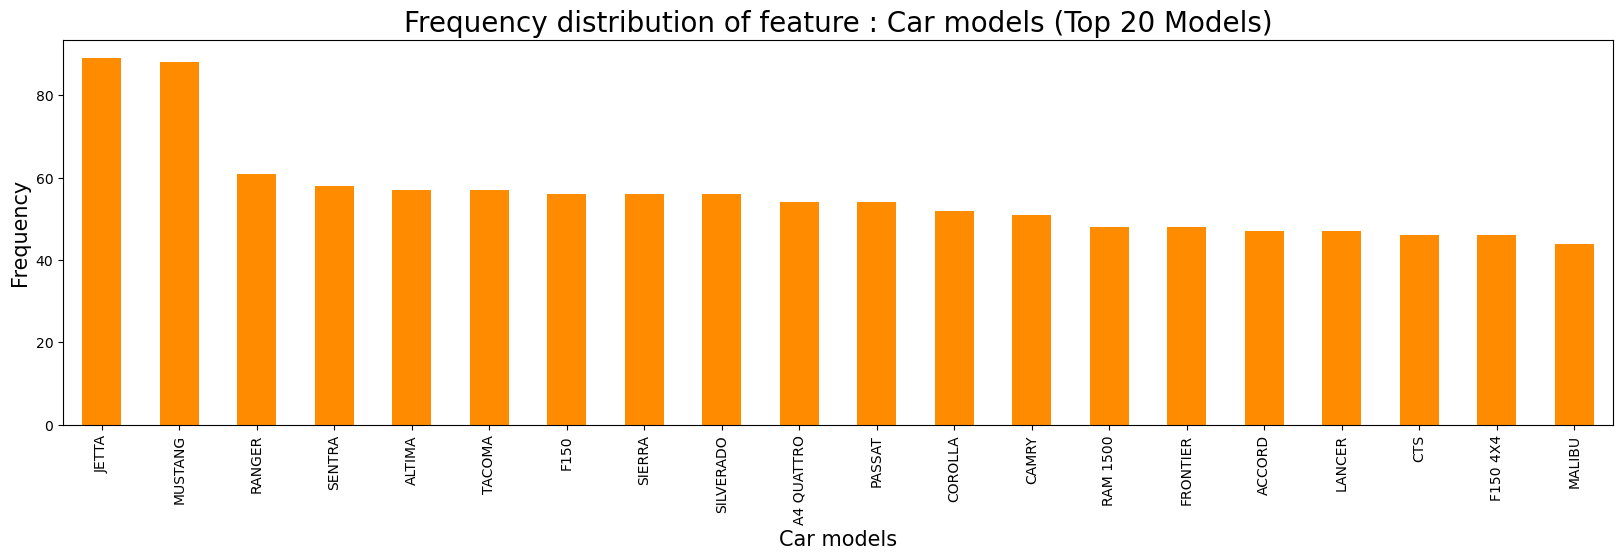

In [58]:
plt.figure(figsize=(20,5));
fc.groupby("MODEL")["MODEL"].count().sort_values(ascending=False)[:20].plot(kind="bar",color='darkorange')
plt.title("Frequency distribution of feature : Car models (Top 20 Models)", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Car models", fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Observation:
* Jetta(89) and Mustang(88),the models are having the highest number of occurence while Malibu has the lowest frequency.

#### 3.Feature:VEHICLE CLASS

In [59]:
fc.value_counts('VEHICLE CLASS')  

VEHICLE CLASS
SUV                         2639
COMPACT                     2636
MID-SIZE                    2299
PICKUP TRUCK - STANDARD     1689
SUBCOMPACT                  1559
FULL-SIZE                   1086
TWO-SEATER                   999
SUV: Small                   929
SUV - SMALL                  825
MINICOMPACT                  783
STATION WAGON - SMALL        735
Mid-size                     660
SUV: Standard                608
Pickup truck: Standard       515
SUV - STANDARD               514
Compact                      491
Subcompact                   451
Full-size                    417
PICKUP TRUCK - SMALL         403
MINIVAN                      366
STATION WAGON - MID-SIZE     343
VAN - CARGO                  332
Two-seater                   313
VAN - PASSENGER              287
Minicompact                  211
Station wagon: Small         138
Pickup truck: Small          108
Special purpose vehicle       62
SPECIAL PURPOSE VEHICLE       52
Station wagon: Mid-size      

In [60]:
fc['VEHICLE CLASS'].nunique()

32

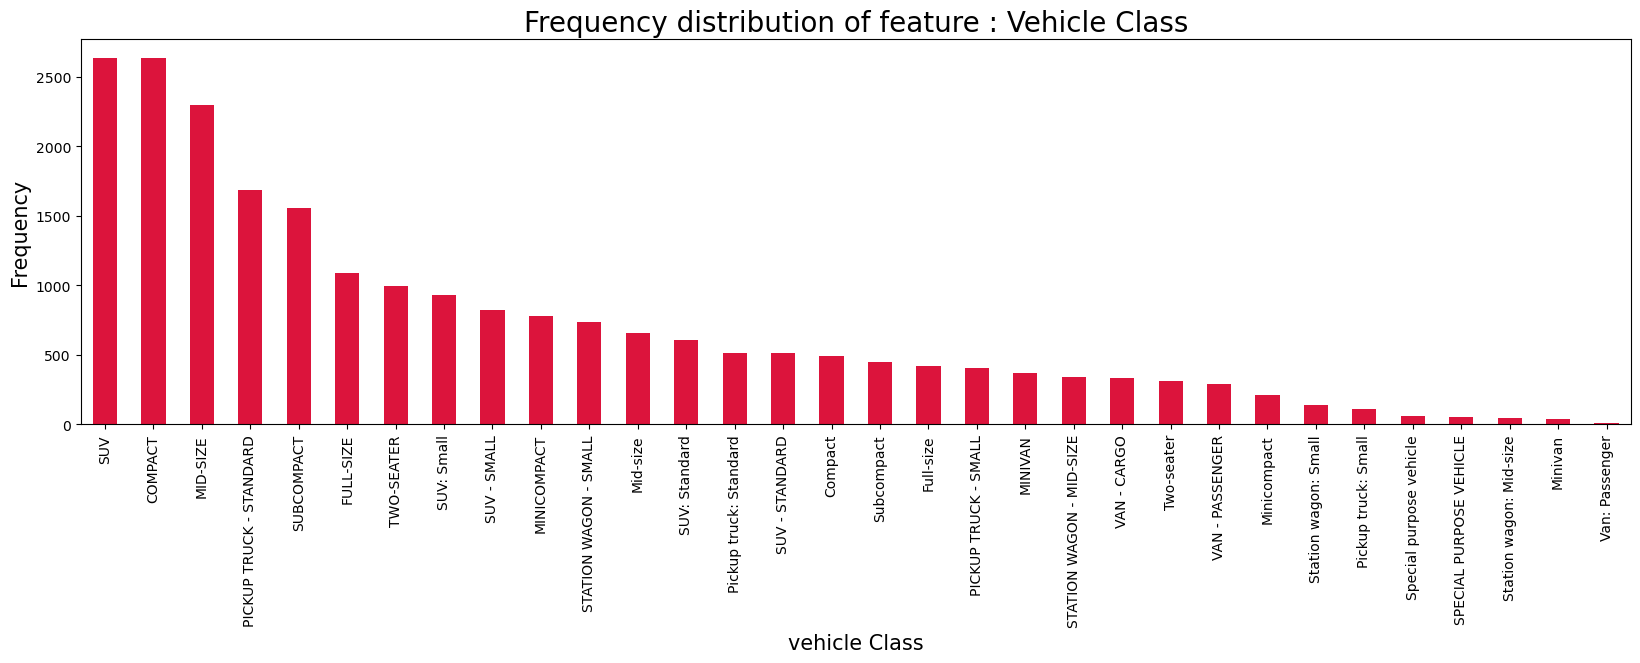

In [61]:
plt.figure(figsize=(20,5));
fc.groupby("VEHICLE CLASS")["VEHICLE CLASS"].count().sort_values(ascending=False).plot(kind="bar",color='crimson')
plt.title("Frequency distribution of feature : Vehicle Class", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("vehicle Class", fontsize=15)
plt.xticks(rotation=90)
plt.show()

#### Observation:
* SUV(2640) and COMPACT(2636) is having the highest number of occurence and Van:Passenger(12) has the lowest frequency.

#### 4.Feature:TRANSMISSION

In [62]:
fc.value_counts('TRANSMISSION')  

TRANSMISSION
Automatic                      8690
Automatic with Select Shift    6736
Manual                         4844
Continuously Variable          1200
Automated Manual               1078
dtype: int64

In [63]:
fc['TRANSMISSION'].nunique()

5

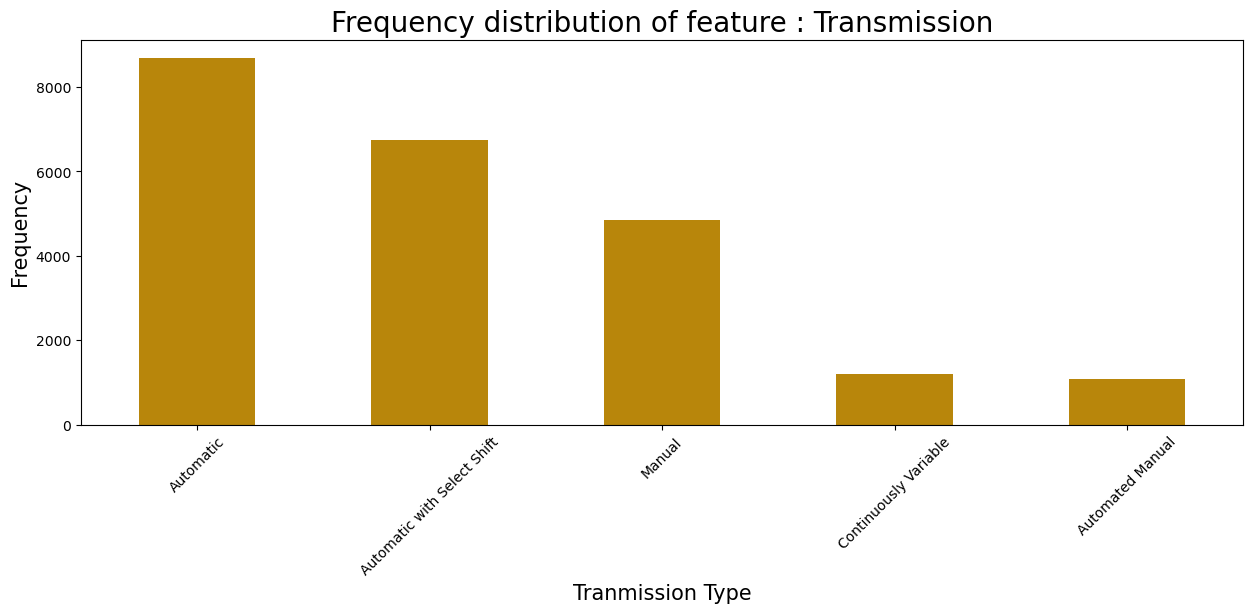

In [75]:
plt.figure(figsize=(15,5));
fc.groupby("TRANSMISSION")["TRANSMISSION"].count().sort_values(ascending=False).plot(kind="bar",color='darkgoldenrod')
plt.title("Frequency distribution of feature : Transmission", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Tranmission Type", fontsize=15)
plt.xticks(rotation=45)
plt.show()

#### Observation:
* Frequency of car with Transmission type Automatic(8691) is the highest and with Automated manual(1078) is the lowest.

#### 5.Feature: FUEL TYPE

In [76]:
fc.value_counts('FUEL_TYPE') 

FUEL_TYPE
Regular gasoline    11815
Premium gasoline     9315
Ethanol              1071
Diesel                314
Natural gas            33
dtype: int64

In [77]:
fc['FUEL_TYPE'].unique()

array(['Regular gasoline', 'Premium gasoline', 'Ethanol', 'Natural gas',
       'Diesel'], dtype=object)

In [78]:
fc['FUEL_TYPE'].nunique()

5

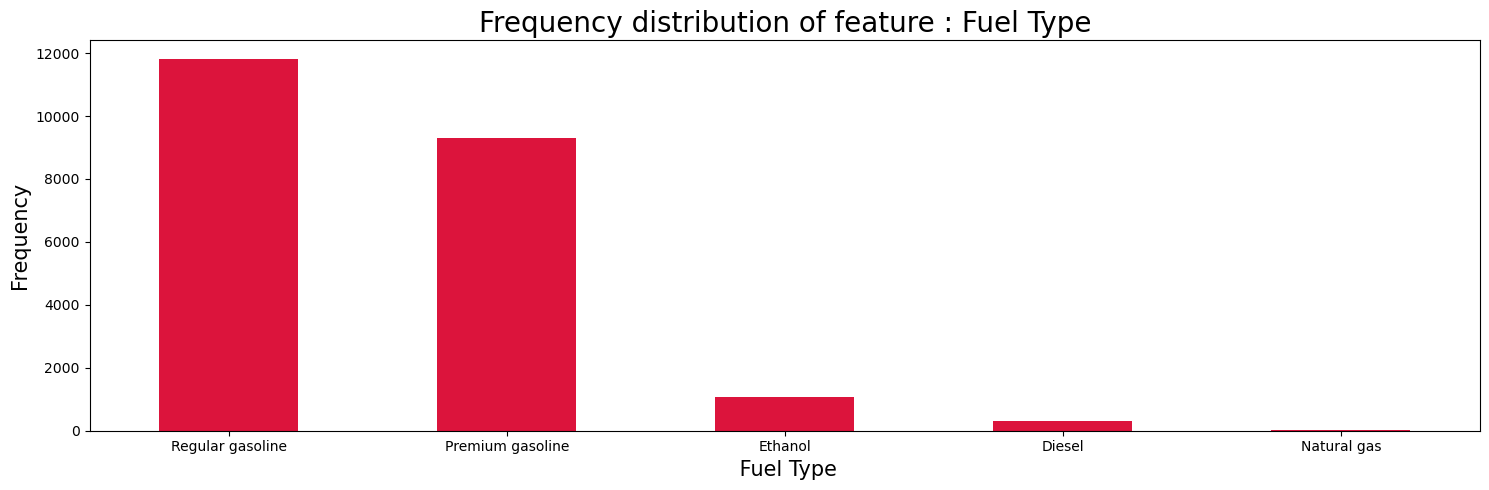

In [79]:
plt.figure(figsize=(15,5));
fc.groupby("FUEL_TYPE")["FUEL_TYPE"].count().sort_values(ascending=False).plot(kind="bar",color='crimson')
plt.title("Frequency distribution of feature : Fuel Type", fontsize=20)
plt.ylabel("Frequency", fontsize=15)
plt.xlabel(" Fuel Type", fontsize=15)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### Observation:
* Car which runs on Gasoline let it be Regular(11822) or Premium(9316) is the most common fuel type. And cars running on Diesel(314) are very low in frquency and Natural Gases(33).

####  Comparing the vehicle brand and its fuel consumption.

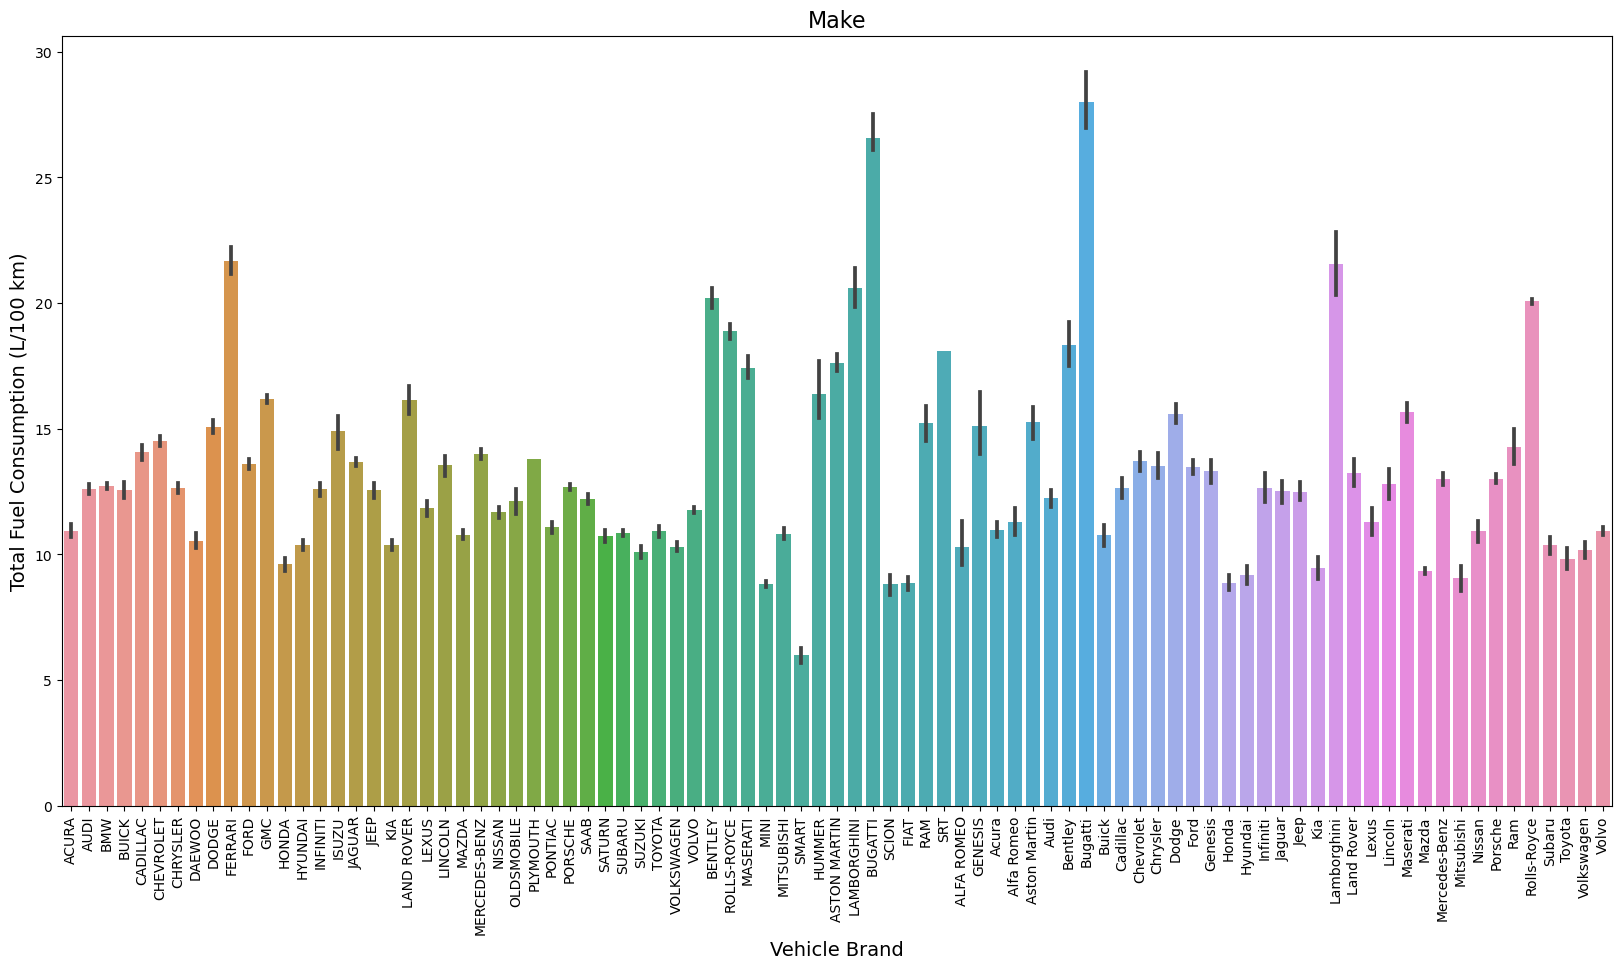

In [136]:
fig = plt.subplots(figsize=(20, 10))
sns.barplot(x=fc['MAKE'],y=fc['FUEL_CONSUMPTION_CITY (L/100 km)'])
plt.xticks(rotation=90)
plt.title('Make',size=16)
plt.xlabel('Vehicle Brand',size=14)
plt.ylabel('Total Fuel Consumption (L/100 km)',size=14)
plt.show()

#### Observation
* To demonstrate the total fuel consumption of different brands. It reveals that 'Smart' consumes fuel the least, while 'Bugatti' has the highest fuel consumption.

#### Comparing the vehicle brand and its CO2 emissions.

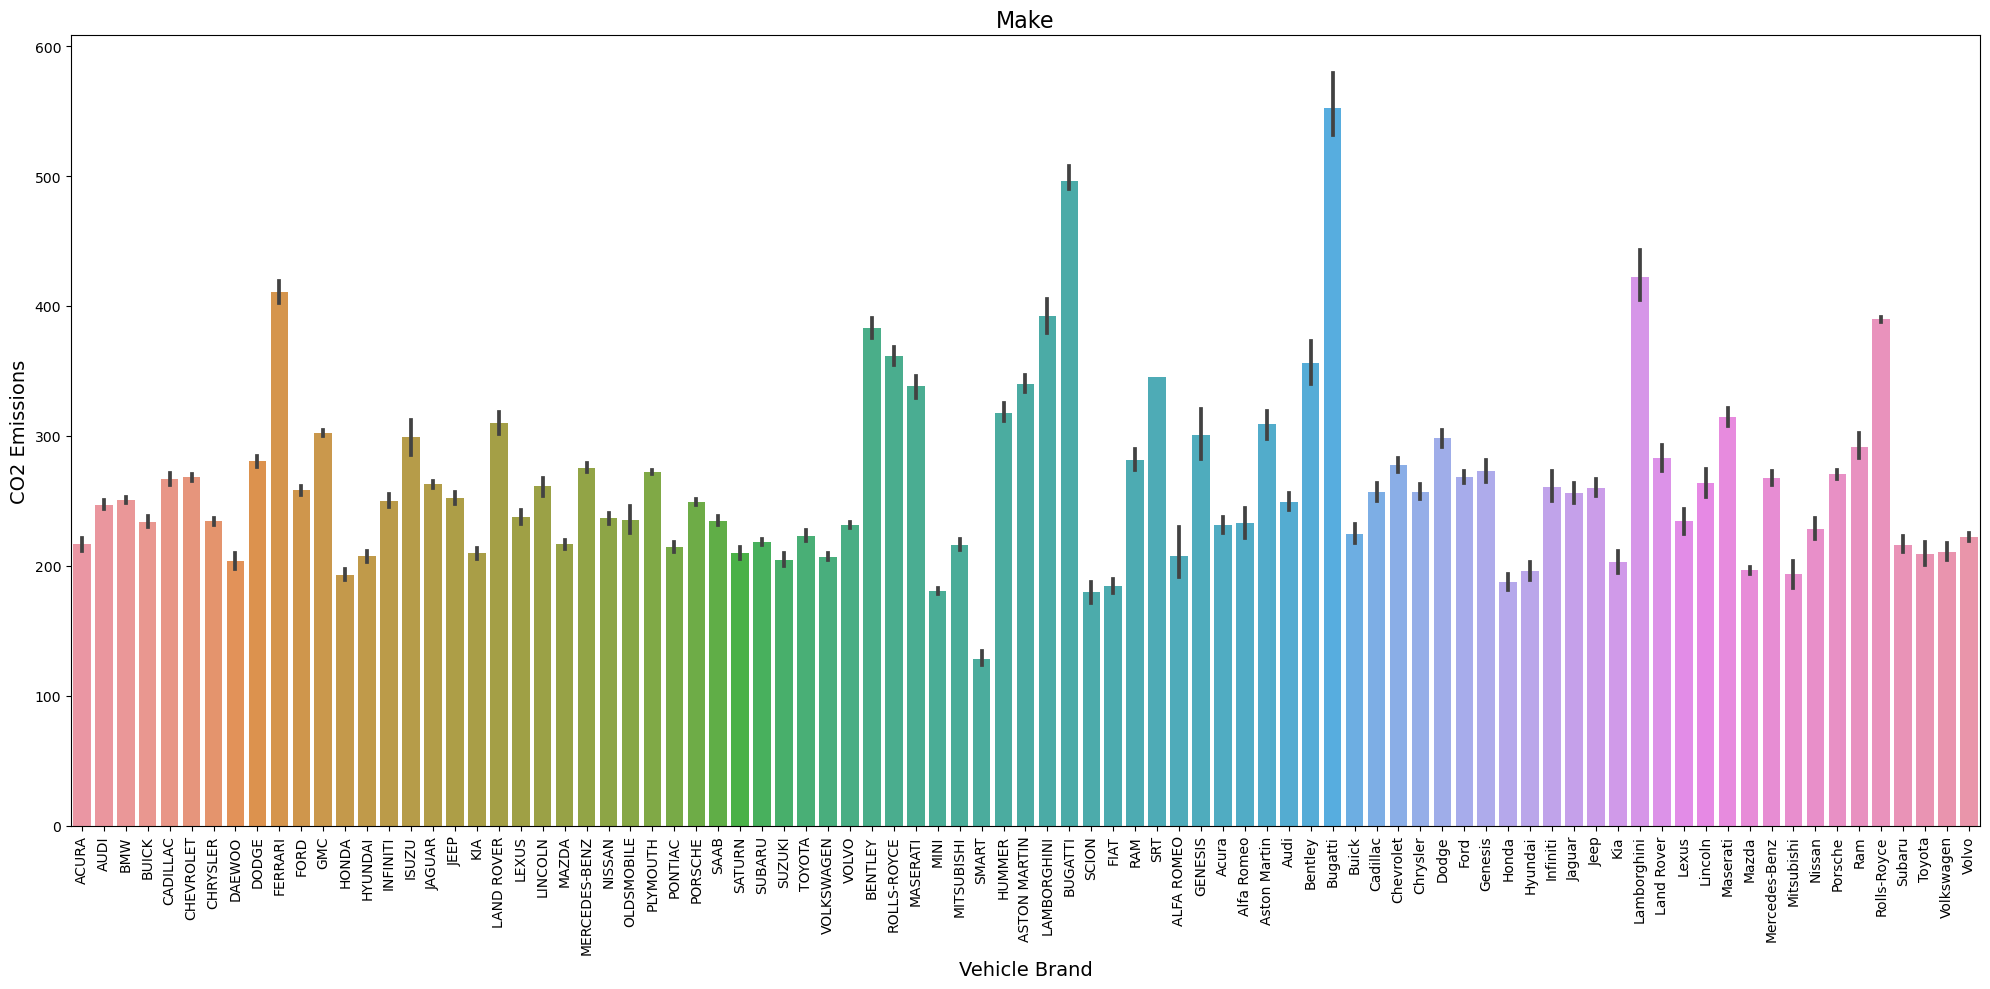

In [135]:
fig = plt.subplots(figsize=(20, 10))
sns.barplot(x=fc['MAKE'],y=fc['CO2_EMISSIONS'])
plt.xticks(rotation=90)
plt.title('Make',size=16)
plt.xlabel('Vehicle Brand',size=14)
plt.ylabel('CO2 Emissions',size=14)
plt.tight_layout()
plt.show()

#### Observation
* 'Smart' seems to be the greenest brand as it emits the least CO2 whereas 'Bugatti' continues to perform poorly in its environmental-friendliness with the highest CO2 emissions.

#### Comparing which models are having the highest Co2 emissions

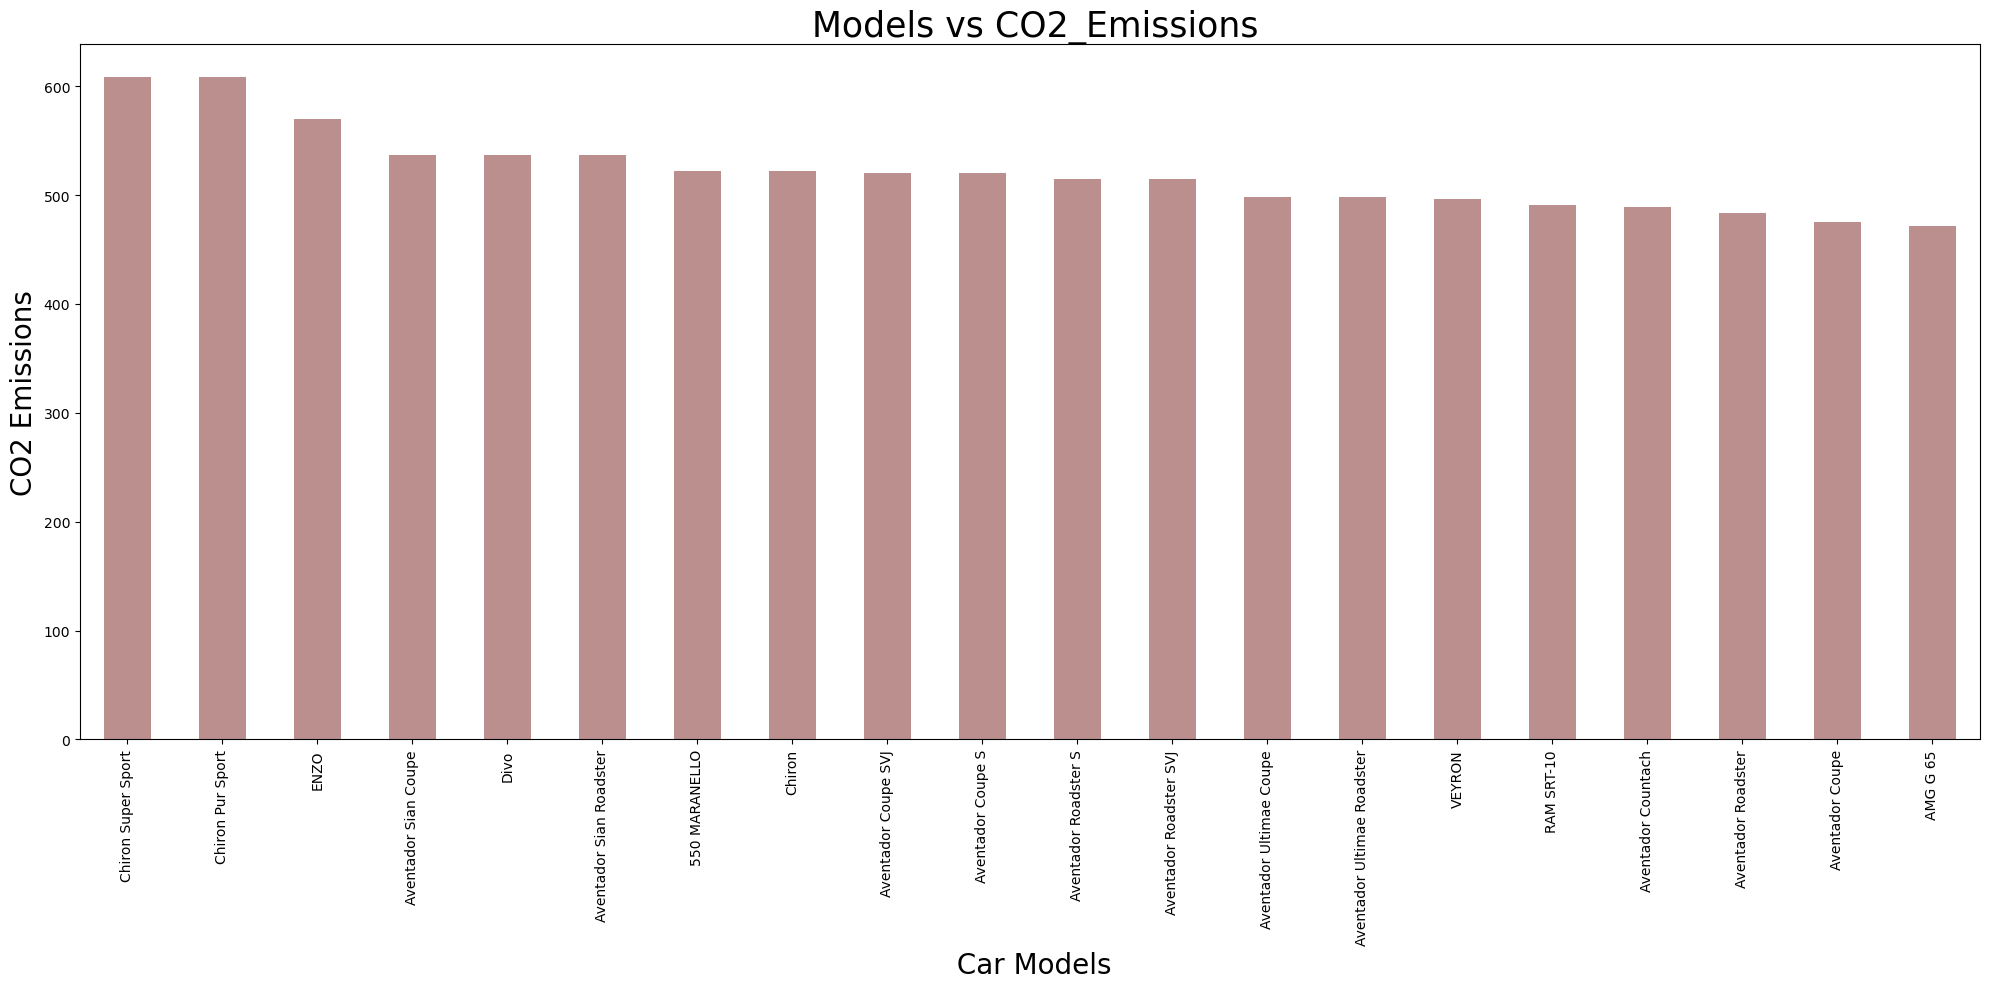

In [134]:
plt.figure(figsize=(20,10))
fc.groupby('MODEL')['CO2_EMISSIONS'].mean().sort_values(ascending=False)[:20].plot(kind='bar', color='rosybrown')
plt.title(' Models vs CO2_Emissions', fontsize=25)
plt.xlabel(' Car Models', fontsize=20)
plt.ylabel('CO2 Emissions', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Observation:
* From the above visuvalization Models such as Chiron super sport and chiron pur sport have the highest CO2 emissions.

#### Comparing which Transmission type are having the highest Co2 emissions

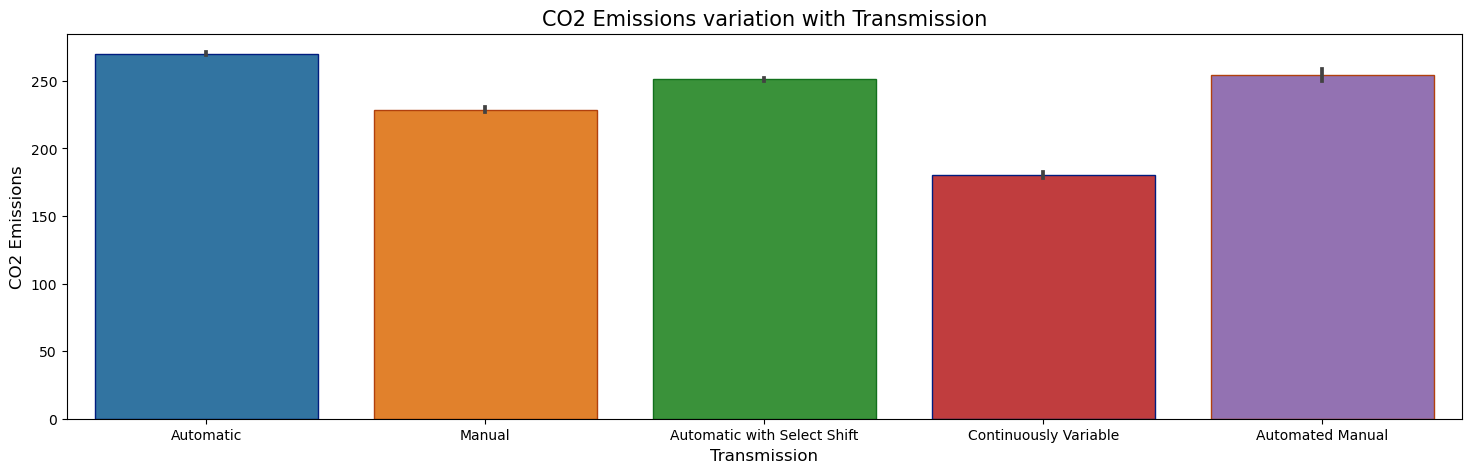

In [83]:
CO2_transmission = fc.groupby(["TRANSMISSION"])['CO2_EMISSIONS'].mean().sort_values().reset_index()
plt.figure(figsize=(18,5))
sns.barplot(x = "TRANSMISSION",y="CO2_EMISSIONS", data = fc,edgecolor=sns.color_palette("dark", 3))
plt.title('CO2 Emissions variation with Transmission', fontsize=15)
plt.xlabel('Transmission', fontsize=12)
plt.xticks(horizontalalignment='center')
plt.ylabel('CO2 Emissions', fontsize=12)
plt.show()

#### Observation:
* It states that automatic with 10 gears transmission type has the highest Co2 emissions.

#### Comparing which Fuel type are having the highest Co2 emissions

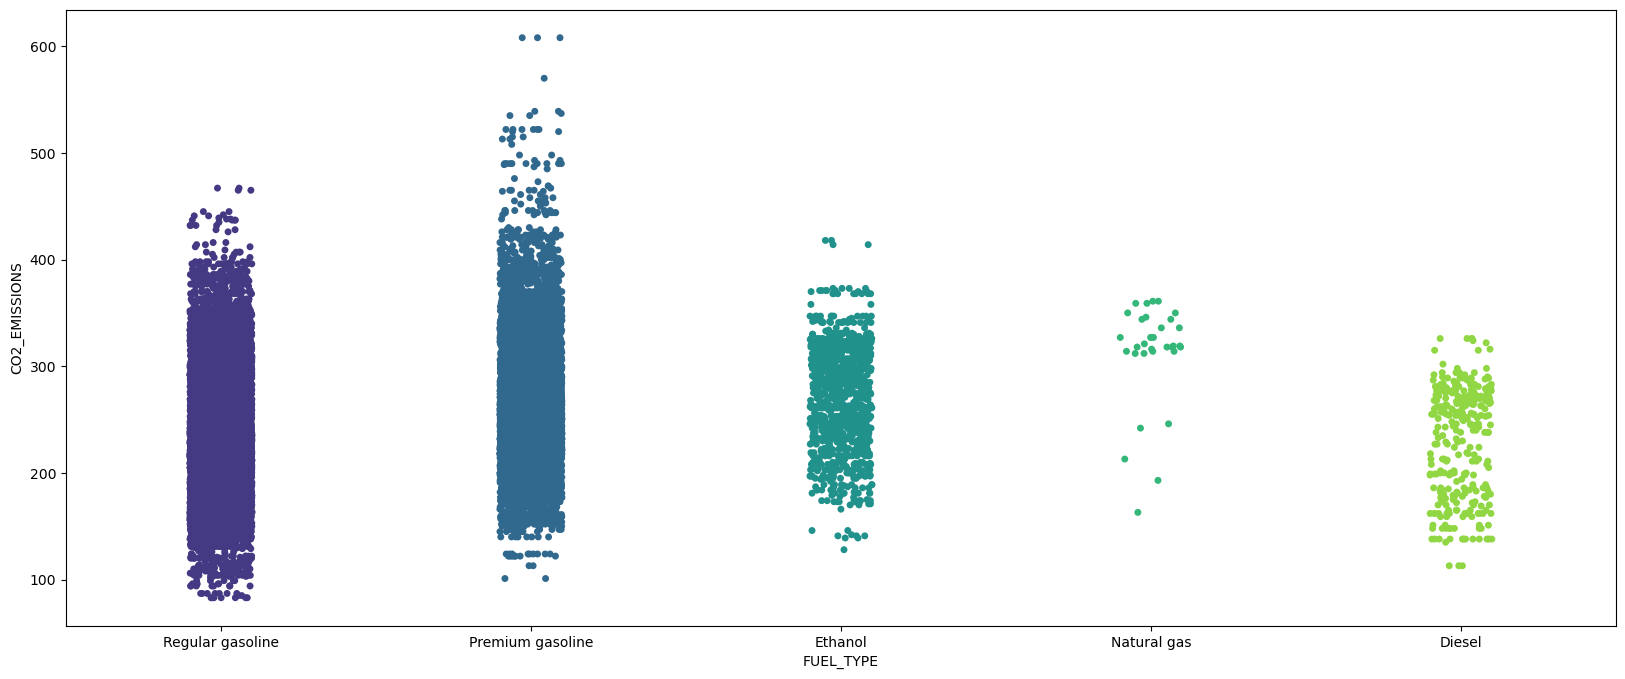

In [84]:
plt.figure(figsize=(20,8))
sns.stripplot(x='FUEL_TYPE', y='CO2_EMISSIONS', data=fc, jitter=True,  dodge=True, palette='viridis')
plt.show()

#### Observation:
* Generally natural gas doesn't emit more CO2 when compared to other fuel types. Regular gasoline, Premium gasoline and Ethanol are the one having the highest Co2 emissions.

#### Distribution of numerical features 

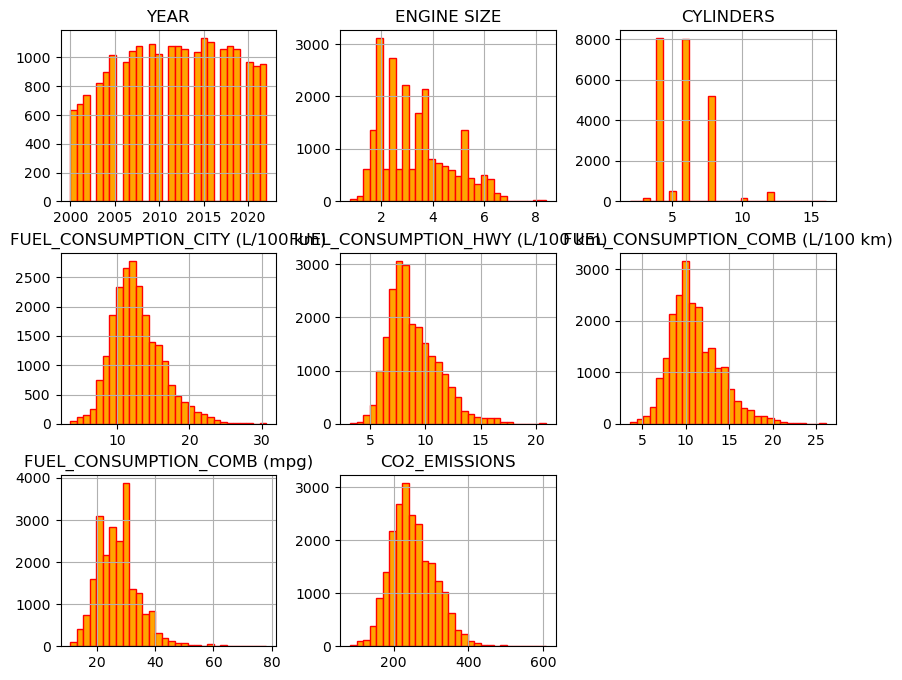

In [85]:
fc.hist(figsize=(10,8),bins=30,color='orange', edgecolor='red')
plt.show()

#### Observation:
* The numerical distribution of  each features is highly skewed.

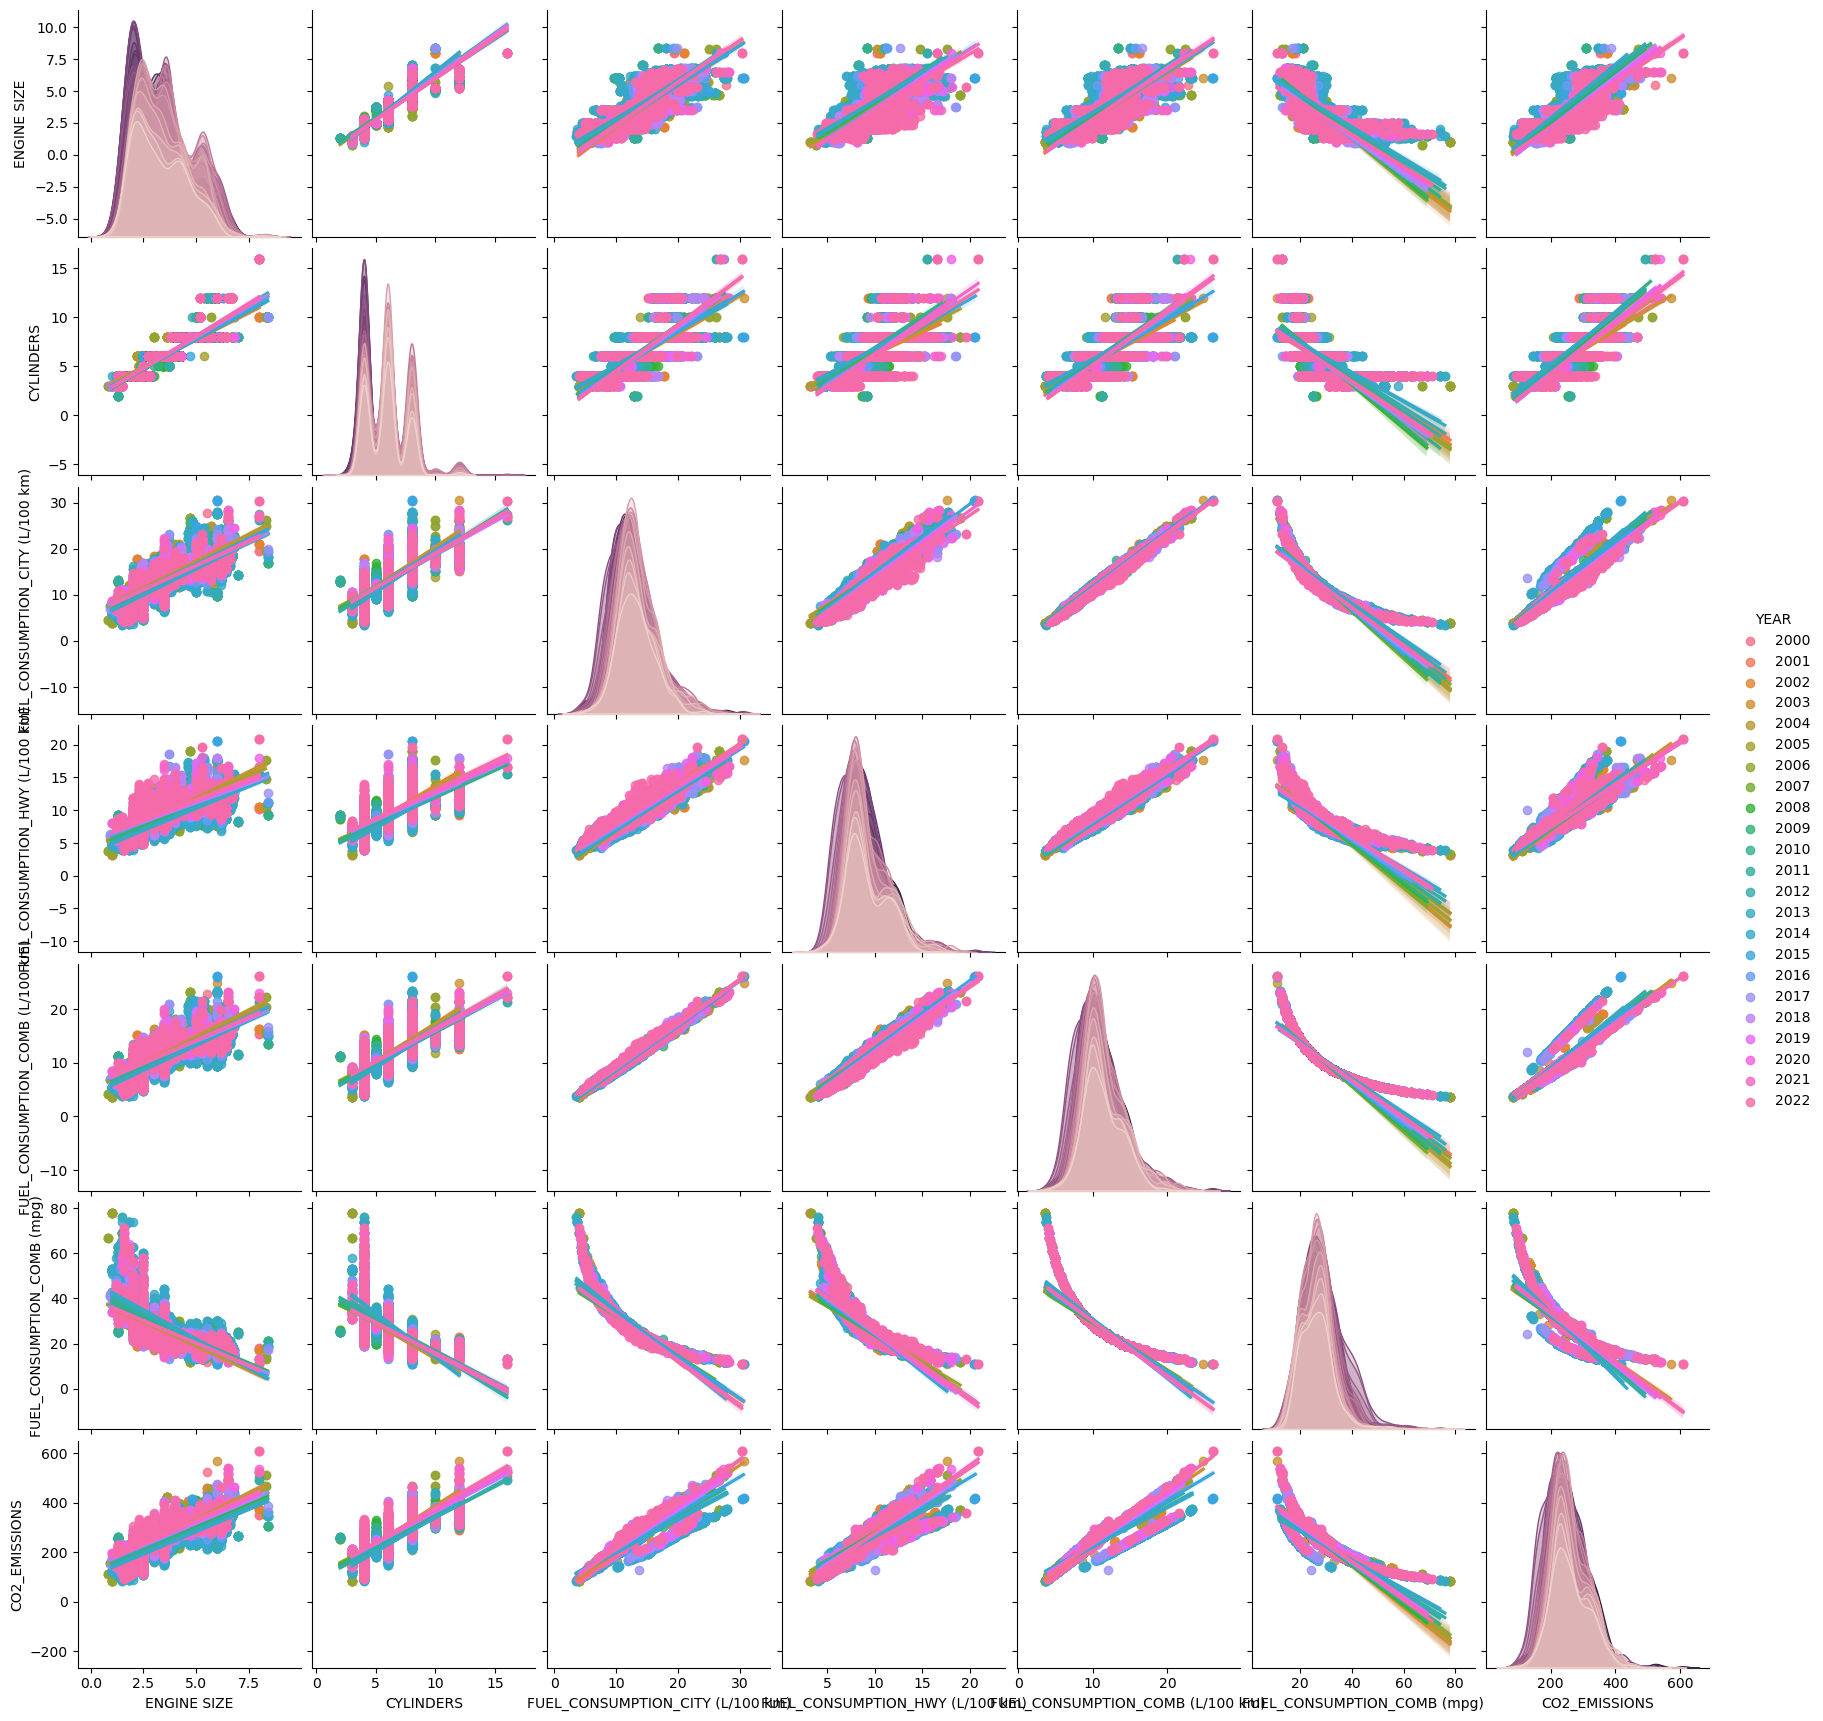

In [86]:
sns.pairplot(fc, kind="reg",hue='YEAR')
plt.show()

####  Observation:
* Comparing the CO2_EMISSIONS with other features
* ENGINE SIZE,CYLINDERS,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km) and COMB(L/100 km) having a strong positive correlations.

### To check Year wise Emissions Report

In [87]:
y=fc.groupby(['YEAR'])['CO2_EMISSIONS'].sum().sort_values(ascending=False) 
y

YEAR
2015    279571
2016    275095
2009    274467
2008    273824
2018    270417
2007    267481
2019    265351
2017    264046
2005    263851
2011    258385
2012    255003
2010    248520
2006    248492
2022    248406
2020    246648
2021    243889
2013    239999
2004    235161
2014    231302
2003    214043
2002    194942
2001    174436
2000    165592
Name: CO2_EMISSIONS, dtype: int64

#### Observation:
* In the year 2015,it has the highest CO2 emission rate  from the above observation.

#### Visualizing the year wise emission report 

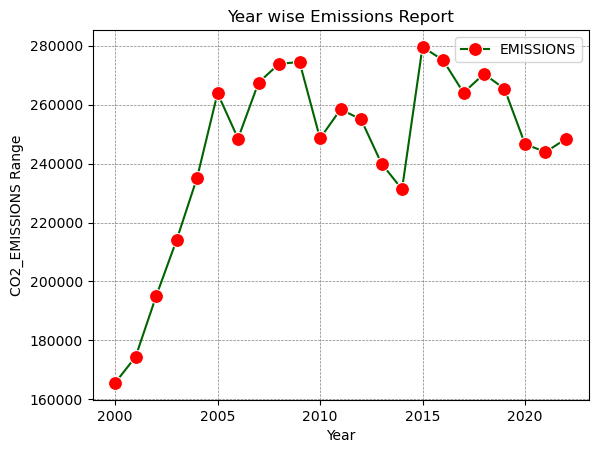

In [101]:
n=y
sns.lineplot(data=y,label='EMISSIONS',linestyle = 'solid',color='darkgreen',marker="o", markerfacecolor = 'red',ms=10)
plt.title('Year wise Emissions Report')
plt.ylabel('CO2_EMISSIONS Range')
plt.xlabel('Year')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.5)
plt.show()

### Observation
  * The above visualization states that,in the year of 2015 it has the highest CO2 emissions rate.

In [41]:
fc.drop(['VEHICLE CLASS'],axis=1,inplace=True) 

In [42]:
fc

,YEAR,MAKE,MODEL,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2_EMISSIONS
0,2000,ACURA,1.6EL,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,1.8,4,A4,X,10.0,7.0,8.6,33,198
...,...,...,...,...,...,...,...,...,...,...,...,...
22551,2022,Volvo,XC40 T5 AWD,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,2.0,4,AS8,Z,11.5,8.4,10.1,28,236


In [43]:
fc.sample(5)

,YEAR,MAKE,MODEL,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),COMB (L/100 km),COMB (mpg),CO2_EMISSIONS
5311,2006,JAGUAR,X-TYPE SPORT BRAKE,3.0,8,M6,Z,12.1,6.9,9.8,29,225
22280,2022,Mercedes-Benz,AMG SL 63 4MATIC+ Roadster,4.0,8,A9,Z,17.1,11.3,14.5,19,339
15680,2016,CHRYSLER,300 AWD,3.6,6,A8,X,12.8,8.6,10.9,26,257
4055,2005,CHRYSLER,SEBRING FFV,2.7,6,A4,E,15.0,10.6,13.0,22,208
7893,2009,ACURA,TSX,2.4,4,AS5,Z,9.6,6.5,8.2,34,189


### Creating a new dataset by seperating out the 2015 year data's from the original dataset.


In [128]:
year_2015=fc.loc[fc.YEAR==2015]

In [129]:
year_2015

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY (L/100 km),FUEL_CONSUMPTION_HWY (L/100 km),FUEL_CONSUMPTION_COMB (L/100 km),FUEL_CONSUMPTION_COMB (mpg),CO2_EMISSIONS
14253,2015,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium gasoline,9.7,6.7,8.3,34,191
14254,2015,ACURA,ILX,COMPACT,2.4,4,Manual,Premium gasoline,10.8,7.4,9.3,30,214
14255,2015,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium gasoline,6.0,6.1,6.1,46,140
14256,2015,ACURA,MDX SH-AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium gasoline,12.7,9.1,11.1,25,255
14257,2015,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium gasoline,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15380,2015,VOLVO,XC60 T6,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium gasoline,10.7,7.8,9.4,30,216
15381,2015,VOLVO,XC60 T6 AWD,SUV - SMALL,3.0,6,Automatic with Select Shift,Regular gasoline,13.6,9.9,11.9,24,274
15382,2015,VOLVO,XC70 3.2 AWD,SUV - SMALL,3.2,6,Automatic with Select Shift,Regular gasoline,13.1,9.1,11.3,25,260
15383,2015,VOLVO,XC70 T5,SUV - SMALL,2.0,4,Automatic with Select Shift,Regular gasoline,9.8,7.6,8.8,32,202


In [130]:
n1=year_2015[['MAKE','MODEL','CO2_EMISSIONS']].groupby(['MAKE','MODEL']).sum('CO2_EMISSIONS')
n1

CO2_EMISSIONS
MAKE  MODEL                      
ACURA ILX                     405
      ILX HYBRID              140
      MDX SH-AWD              255
      RDX AWD                 244
      RLX                     230
...                           ...
VOLVO XC60 T6                 216
      XC60 T6 AWD             274
      XC70 3.2 AWD            260
      XC70 T5                 202
      XC70 T6 AWD             274

[736 rows x 1 columns]

#### Creating index for the features

In [131]:
res_n1 = n1.reset_index()
res_n1

,MAKE,MODEL,CO2_EMISSIONS
0,ACURA,ILX,405
1,ACURA,ILX HYBRID,140
2,ACURA,MDX SH-AWD,255
3,ACURA,RDX AWD,244
4,ACURA,RLX,230
...,...,...,...
731,VOLVO,XC60 T6,216
732,VOLVO,XC60 T6 AWD,274
733,VOLVO,XC70 3.2 AWD,260
734,VOLVO,XC70 T5,202


#### Observation:
* In the year of 2015, BMW has the highest CO2 emission rate.

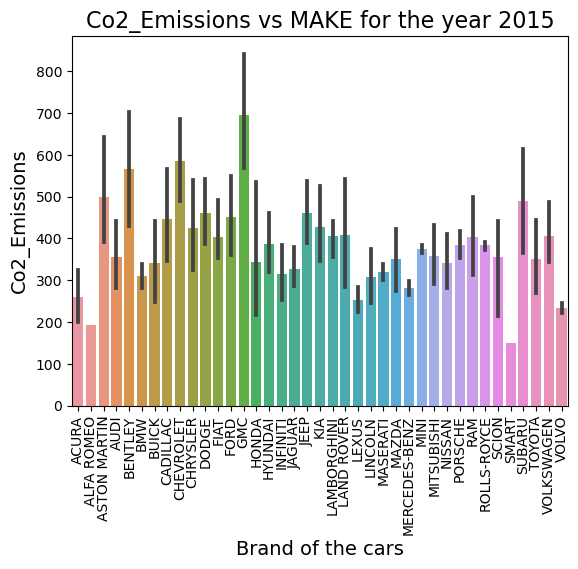

In [132]:
sns.barplot(x=res_n1['MAKE'],y=res_n1['CO2_EMISSIONS'])
plt.title('Co2_Emissions vs MAKE for the year 2015',size=16)
plt.xticks(rotation=90)
plt.xlabel('Brand of the cars',size=14)
plt.ylabel('Co2_Emissions',size=14)
plt.show()

In [133]:
n1['CO2_EMISSIONS'].max() 

1505

#### Observation:
* From the above visualization, it is clearly showing that GMC has the highest Co2_Emissions in the year 2015.

#### Conclusion:
* In Canada,the brand Bugatti is the one which consumes more fuel and has the highest CO2 emissions while Smart consumes less fuel and emits less Co2.
* While Bugatti consumes more fuel and emits more CO2, there should be need to change the functioning of Bugatti to consume less fuel.
* It is better to use natural gas rather than using Premium Gasoline, Regular gasoline,Diesel and Ethanol.
* While going for natural gas, there should be decrease in CO2 emissions.

#### Reference:
* https://www.kaggle.com/datasets/ahmettyilmazz/fuel-consumption